# **Homework 7**
## Mark Hendricks - Discussion

# 1. GMO

## 1.1. GMO’s approach.

**(a) Why does GMO believe they can more easily predict long-run than short-run asset class
performance?**

**Solution**: They believe that in the long-run, the market is a “weighting machine”, in that prices are
determined by economic fundamentals. Thus, as a macro-strategy fund, they believe their
economic info can predict long-run returns but that short-run returns can be influenced
substantially by behavioral trading.

**(b) What predicting variables does the case mention are used by GMO? Does this fit with the
goal of long-run forecasts?**

**Solution**: The case discusses price-earnings and price-dividend ratios in some detail. Given the high
serial correlation in these variables, it is no surprise that GMO think s their predictive
power is stronger over long-run horizons

**(c) How has this approach led to contrarian positions?**

**Solution**: GMO is, in a macro sense, a value investor. They invest in asset classes with low prices
per cash flow. This means that they are buying into depressed assets and missing out on
assets with large run-ups in price. The case mentions that as GMO missed the bull market
of the late 1990?s, they experienced large withdrawals before ultimately being proven right
in the crash of 2000-2001.

**(d) How does this approach raise business risk and managerial career risk?**

**Solution**:GMO’s contrarian positions put it in some funding risk. If they deviate too much from
other funds during strong performance, clients may want to withdraw money. (Of course,
if GMO can survive, they can show strong performance when other funds are not doing
well.) This is exactly what happened in the late 1990’s.
This same effect impacts managers, who may be rated as missing strong run-ups even if
their contrarian strategy will pay off in the long run.


## 1.2. The market environment.

**(a) We often estimate the market risk premium by looking at a large sample of historic data.
What reasons does the case give to be skeptical that the market risk premium will be as
high in the future as it has been over the past 50 years?**

**Solution**: The case shows that the price-dividend and price-earning ratios are much higher than their
historic average. This decades-long rise in prices-per-cashflow increased returns, but there
seems to be little room for further gains in P/D and P/E ratios.


**(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest
drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See
Exhibit 9.)**

**Solution**: The two biggest drivers of the negative conditional forecast versus the unconditional forecast
are the expected decline in the dividend-price ratio and the decline in profit margin

**(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now**

**Solution**: Relative to 2007, the 2011 forecast revises expected bond returns down substantially (from
2% to 0.1%,) while revising expected dividend-price contraction to 0%.

## 1.3. Consider the asset class forecasts in Exhibit 1.

**(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011?**

**Solution**: U.S. Equities is the only class with a negative outlook over that period.

**(b) Which asset classes substantially outperformed GMO’s estimate over that time period?**

**Solution**: While many asset classes outperformed, foreign-government bonds seemed to outperform
the most.

**(c) Which asset classes substantially underperformed GMO’s estimate over that time period?**

**Solution**: U.S. Real Estate and U.S. Tbills are the only classes which under-performed GMO’s estimates.


## 1.4. Fund Performance.

**(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997-
2011?**

**Solution**: Based on the chart, through most of the period GMWAX was most heavily allocated in
U.S. Fixed Income.

**(b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed;
simply comment on the comparison in the exhibits.)**

**Solution**: The fund has been quite successful relative to the benchmark, with returns almost double
the benchmark and a Sharpe ratio more than double. We don?t have a long enough series
of returns to do a more involved statistical analysis of the performance.


# 2 Analyzing GMO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 4)

import sys
sys.path.insert(0, '../cmds')
from portfolio import *

In [2]:
data_file_path = '../data/gmo_analysis_data.xlsx'

rets = pd.read_excel(data_file_path,sheet_name='returns (total)')
rets.set_index('Date',inplace=True)

rf = pd.read_excel(data_file_path,sheet_name='risk-free rate')
rf.set_index('Date',inplace=True)

retsx = rets.subtract(rf['US3M'], axis=0)
retsx.dropna(axis=0,inplace=True)

retsx_pre = retsx.loc[:'2011',:]
retsx_post = retsx.loc['2012':,:]

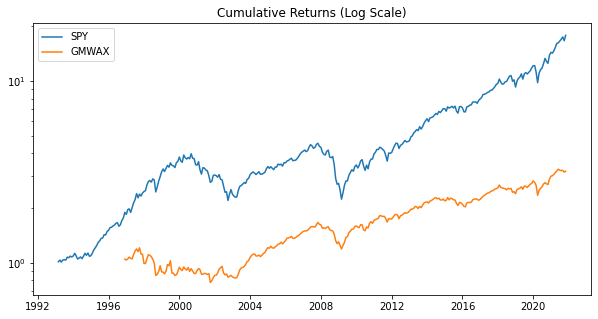

In [3]:
plotdata = (1+rets).cumprod()
fig = plt.figure(figsize=(10,5))
plt.plot(plotdata)
plt.legend(plotdata.columns)
plt.title('Cumulative Returns (Log Scale)')
plt.yscale('log')

### 1. Summary Stats

In [4]:
df_all = performanceMetrics(retsx,annualization=12)
df_pre = performanceMetrics(retsx_pre,annualization=12)
df_post = performanceMetrics(retsx_post,annualization=12)

performance = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
performance

Mean     Vol  Sharpe     Min     Max
1996-2011 SPY    0.0400  0.1650  0.2424 -0.1656  0.1091
          GMWAX  0.0158  0.1250  0.1266 -0.1492  0.0821
2012-2021 SPY    0.1545  0.1311  1.1785 -0.1247  0.1269
          GMWAX  0.0593  0.0853  0.6952 -0.1187  0.0713
1996-2021 SPY    0.0850  0.1532  0.5552 -0.1656  0.1269
          GMWAX  0.0329  0.1111  0.2964 -0.1492  0.0821

Notes:
- Sharpe of GMWAX is lower than SPY in the entire sample and in all subsamples.
- Mean returns of GMWAX are much lower than SPY, while vol is modestly lower.
- Since the case, (2012-2021,) GMWAX has severely underperformed SPY (roughly half the Sharpe.)

### 2. Tail Risk

See the table above for min returns and see the table below for other tail-risk stats.

Overall, the tail-risk statistics are broadly similar.

- Note that the vol of GMWAX is a bit smaller than that of SPY, so the tail-risk stats would be expected to be lower for GMWAX.

- Still, if we measure VaR and CVaR relative to vol, they are comparable.

Below the tail-risk is calculated on excess returns. (Maximum drawdown would make more sense measured as total returns, but the answers are similar.)

In [5]:
df_pre = tailMetrics(retsx_pre)
df_post = tailMetrics(retsx_post)
df_all = tailMetrics(retsx)

drawdown = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
drawdown

Skewness  Kurtosis  VaR (0.05)  CVaR (0.05)  Max Drawdown  \
1996-2011 SPY     -0.5009    0.5517     -0.0802      -0.1051       -0.5600   
          GMWAX   -1.1693    3.0863     -0.0598      -0.0965       -0.4729   
2012-2021 SPY     -0.5192    1.8591     -0.0602      -0.0821       -0.1963   
          GMWAX   -0.9420    4.8441     -0.0306      -0.0540       -0.1696   
1996-2021 SPY     -0.5693    0.9944     -0.0754      -0.1003       -0.5600   
          GMWAX   -1.2239    4.0399     -0.0449      -0.0858       -0.4729   

                      Peak     Bottom              Recover  \
1996-2011 SPY   2000-03-31 2009-02-28                  NaN   
          GMWAX 1997-09-30 2001-09-30  2011-04-30 00:00:00   
2012-2021 SPY   2019-12-31 2020-03-31  2020-07-31 00:00:00   
          GMWAX 2019-12-31 2020-03-31  2020-11-30 00:00:00   
1996-2021 SPY   2000-03-31 2009-02-28  2013-03-31 00:00:00   
          GMWAX 1997-09-30 2001-09-30  2011-04-30 00:00:00   

                Duration (to Recover)  
1996-2011 SPY                     NaT  
          GMWAX                   NaT  
2012-2021 SPY                213 days  
          GMWAX              335 days  
1996-2021 SPY               4748 days  
          GMWAX             4960 days

Even normalizing for difference in volatility:
- Tail risk is somewhat lower for GMWAX, as seen in Min, VaR, and CVaR in table above.

Max drawdown for GMWAX is...
- lower in every subsample, as seen in table below.
- longer in duration in every subsample.
- in the run of growth stocks (1997-2001) whereas for SPY it is the financial crisis (2000-2009)

### 3. Market Regressions

There is substantial market beta, but not so much to say it is essentially a market strategy.
- The beta is roughly 0.5 across all three samples.

Though not completely correlated to the market, it is not clear that the difference is adding value.
- The alpha is negative in both subsamples, but substantially worse post-case.
- The Information Ratio is negative in all subsamples, and it is substantially worse in the post-case.

In [6]:
df_all = get_ols_metrics(retsx[['SPY']], retsx[['GMWAX']], annualization=12)
df_pre = get_ols_metrics(retsx_pre[['SPY']], retsx_pre[['GMWAX']], annualization=12)
df_post = get_ols_metrics(retsx_post[['SPY']], retsx_post[['GMWAX']], annualization=12)

mktreg = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
mktreg

mktreg.style.format({
    'alpha': '{:,.2%}'.format,
    'Passive': '{:,.2f}'.format,
    'r-squared': '{:,.2%}'.format,
    'Info Ratio': '{:,.2%}'.format,
})

,,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
1996-2011,GMWAX,-0.58%,0.5396,50.71%,0.0293,-6.55%
2012-2021,GMWAX,-2.85%,0.5683,76.33%,0.1044,-68.72%
1996-2021,GMWAX,-1.35%,0.5461,56.68%,0.0603,-18.48%


# 3. Forecast Regressions

In [7]:
sigs = pd.read_excel(data_file_path,sheet_name='signals')
sigs.set_index('Date',inplace=True)
sigs

,DP,EP,US10Y
Date,,,
1993-02-28,2.82,4.44,6.03
1993-03-31,2.77,4.41,6.03
1993-04-30,2.82,4.44,6.05
1993-05-31,2.81,4.38,6.16
1993-06-30,2.79,4.31,5.80
...,...,...,...
2021-06-30,1.37,2.19,1.45
2021-07-31,1.34,3.64,1.24
2021-08-31,1.32,2.83,1.30


### Total or Excess?
- We could forecast returns or excess returns. Below we forecast total returns.

### Shifting
- We shift X by a period so that it is lagged in the regression:
$$r_{t+1} = \alpha + \boldsymbol{\beta}' \boldsymbol{x}_t + \epsilon_{t+1}$$

To get the lagged regression, we need to shift the values.
- Pandas will by default line up the dates of two dataframes
- By shifting the X dataframe forward in time, we have ensured the lag. 
- The X (signal) dates are already lagged, and thus y (Feb 2021) and X (Feb 2021) are from data observed in y as of Feb 2021 and X as of Jan 2021. This fits our lagged regression as desired.

#### Cleaning and aligning the data
Note that lagging the regressors causes the first date to be NaN.
- Thus we `dropna()` which drops the first date from the regressors.
- This means we also need to realign the dependent variable.

In [8]:
# lag the independent variable, so that we can align date stamps and still have lag
sigs_lag = sigs.shift().dropna()

# align the data frames to the same subset of dates
sigs_lag, spy = sigs_lag.align(rets[['SPY']], join='inner',axis=0)

## 3.1 Forecast setup

We will date the forecast by the date it is forecasting, not the date it was calculated.
- Example: if we use Feb data to forecast a Mar return, it would have a March date stamp.

For a baseline forecast, we use the mean return up to that point.
- We need to shift the mean return (lag it) as the mean through Feb is our forecast for March
- This shifting will introduce an NaN at the start, which is dropped.
- Thus, we should calculate this from the full series, `rets` rather than `spy`, which has already had the first date dropped. (And thus, we would be dropping a second value by doing the calculation with `spy` as the input, due to the induced `NaN` value.

In [9]:
forecasts = rets[['SPY']].expanding().mean().shift(1).dropna()
forecasts.columns = ['Mean']

# Define the models for the other forecasts
model_map = {'DP':['DP'], 'EP':['EP'], 'ALL':sigs.columns}

for model in model_map.keys():
    X = sigs_lag[model_map[model]]
    forecasts[model] = LinearRegression().fit(X,spy).predict(X)
    
forecasts.dropna(inplace=True)
forecasts

,Mean,DP,EP,ALL
Date,,,,
1993-03-31,0.0107,0.0164,0.0090,0.0120
1993-04-30,0.0165,0.0160,0.0089,0.0116
1993-05-31,0.0025,0.0164,0.0090,0.0120
1993-06-30,0.0086,0.0163,0.0088,0.0116
1993-07-31,0.0076,0.0161,0.0086,0.0118
...,...,...,...,...
2021-06-30,0.0091,0.0051,0.0064,0.0064
2021-07-31,0.0092,0.0049,0.0024,0.0030
2021-08-31,0.0092,0.0047,0.0066,0.0067


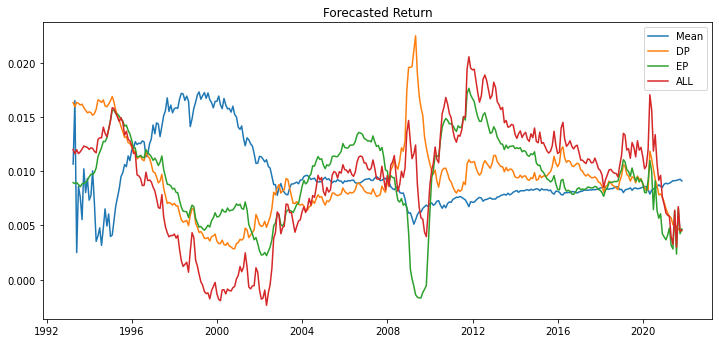

In [10]:
plot_data = forecasts
fig = plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
plt.plot(plot_data)
plt.legend(plot_data.columns)
plt.title('Forecasted Return')
plt.show()   

## 3.2 Build the Investment Strategy 

Use the forecasts to build investment weights.

Here, we are only investing in one security, SPY, so it is just a question of how much we lean in/out of SPY.

Per the Homework, we use
$$w_t = 100 * \mathbb{E}_t\left[r_{t+1}\right]$$
so for example,
the weight at the end of Feb is 100 times the Feb-based forecast of the March value of SPY.

The return to this strategy, will of course be multiplied by the realized return:
$$r_{t+1}^{\text{strategy}} = w_t * r_{t+1}^{\text{SPY}}$$
so for example,
the return on the strategy for March is the March SPY return multiplied by 100 * the forecast of the March SPY return, (and this forecast is derived in Feb, pointing toward March.)

### Pandas

Pandas naturally wants to align the dates. So once again, we don't want to actually try to multiply objects with different datestamps.

Accordingly, we made the signals have a datestamp of t+1, which gives the forecasts a datestamp of t+1 (i.e. the forecasts are stamped with the time period they are forecasting, not the time period they were calculating.)

Thus, the weight calculated in Feb for use from Feb to March will already be stamped as March, given the datestamp of the signals and forecasts. Given this, it is fine that Pandas will multiply the March realized return with the March weight (since this weight was calculated in Feb and is targeting March.)

In [11]:
wts = 100 * forecasts

fund_returns = wts * spy.values
fund_returns.insert(0,'Passive', spy)
fund_returns

,Passive,Mean,DP,EP,ALL
Date,,,,,
1993-03-31,0.0224,0.0239,0.0367,0.0201,0.0269
1993-04-30,-0.0256,-0.0423,-0.0408,-0.0227,-0.0297
1993-05-31,0.0270,0.0067,0.0441,0.0242,0.0323
1993-06-30,0.0037,0.0032,0.0060,0.0032,0.0043
1993-07-31,-0.0049,-0.0037,-0.0078,-0.0042,-0.0057
...,...,...,...,...,...
2021-06-30,0.0225,0.0205,0.0114,0.0143,0.0144
2021-07-31,0.0244,0.0224,0.0120,0.0058,0.0073
2021-08-31,0.0298,0.0274,0.0139,0.0197,0.0200


### Assess the Active Performance 

In [12]:
print('Correlation of funds performances:')
fund_returns.corr().style.format('{:,.1%}'.format)

Correlation of funds performances:


,Passive,Mean,DP,EP,ALL
Passive,100.0%,94.2%,91.0%,88.3%,82.8%
Mean,94.2%,100.0%,76.0%,81.4%,63.9%
DP,91.0%,76.0%,100.0%,78.3%,90.1%
EP,88.3%,81.4%,78.3%,100.0%,88.7%
ALL,82.8%,63.9%,90.1%,88.7%,100.0%


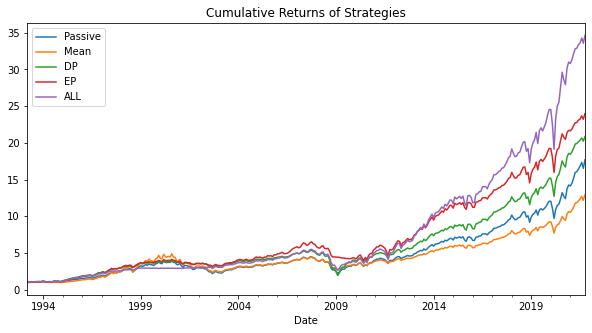

In [13]:
(fund_returns + 1).cumprod().plot(figsize=(10,5), title='Cumulative Returns of Strategies');

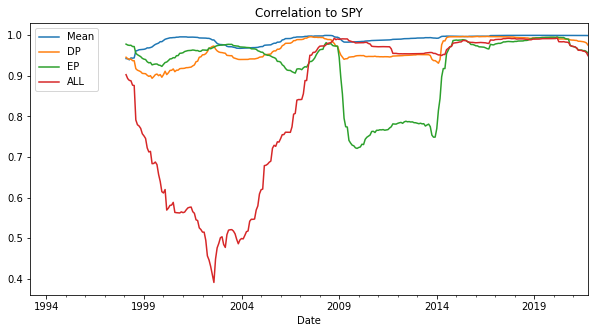

In [14]:
corr_rolling = fund_returns.rolling(60).corr()
dynamic_corrs = (corr_rolling['Passive'].unstack(1))
dynamic_corrs = dynamic_corrs.reindex(columns=fund_returns.columns).drop(columns=['Passive'])
dynamic_corrs.plot(figsize=(10,5),title='Correlation to SPY');

### Performance Metrics

In [15]:
performanceMetrics(fund_returns,annualization=12).style.format('{:,.2%}'.format)

,Mean,Vol,Sharpe,Min,Max
Passive,11.14%,14.62%,76.20%,-16.52%,12.70%
Mean,10.12%,15.17%,66.73%,-23.27%,15.30%
DP,11.80%,15.11%,78.09%,-21.15%,22.37%
EP,12.00%,13.21%,90.81%,-11.94%,19.28%
ALL,13.54%,14.99%,90.32%,-17.02%,22.46%


In [16]:
tailMetrics(fund_returns)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
Passive,-0.6182,1.2525,-0.0694,-0.0941,-0.5080,2007-10-31,2009-02-28,2012-03-31,1613 days
Mean,-0.5703,3.1574,-0.0674,-0.0966,-0.5177,2000-08-31,2002-09-30,2013-07-31,4717 days
DP,-0.4957,6.1660,-0.0579,-0.0976,-0.6415,2007-10-31,2009-02-28,2012-03-31,1613 days
EP,0.0154,2.3299,-0.0549,-0.0776,-0.3850,2007-10-31,2010-06-30,2012-03-31,1613 days
ALL,0.0999,4.7525,-0.0645,-0.0964,-0.5193,2007-10-31,2009-02-28,2011-04-30,1277 days


In [17]:
get_ols_metrics(spy, fund_returns, annualization=12)

,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
Passive,2.0817e-17,1.0000,1.0000,0.1114,NaN
Mean,-7.6863e-03,0.9779,0.8879,0.1035,-0.1513
DP,1.3172e-02,0.9407,0.8288,0.1254,0.2107
EP,3.1071e-02,0.7980,0.7798,0.1503,0.5012
ALL,4.0830e-02,0.8491,0.6855,0.1595,0.4856


## 3.3 Conclusions

The tables above indicate...
- The active strategies are highly correlated.
- The active strategies (in-sample) deliver slightly improved Sharpe Ratio relative to the Passive strategy.
- The active strategies (in-sampel) deliver positive alpha and positive Info Ratios
- The Earnings-Price signal is more helpful than the Dividend-Price signal, as seen in the EP strategy doing better than the DP strategy.

We also note that...
- The Expanding Mean strategy does poorly relative to the Passive strategy.

With regard to tail risk,
- The EP strategy has better tail-risk stats than the other strategies
- The DP and ALL strategies do not show substantially higher risk in any metric. (DP has a bit higher tail-risk, but lower VaR.) 

### Underperformance during 2000-2011

In the table below, we see that the passive, mean, and forecasting strategies underperform the risk-free rate through most of the 12-year period.

At the very end, the ALL and EP strategies barely outperform the risk-free rate.

Between the crashes of 2001-2003 and 2008, this is a bad period for equities, in line with GMO's forecast that stocks would under-perform.

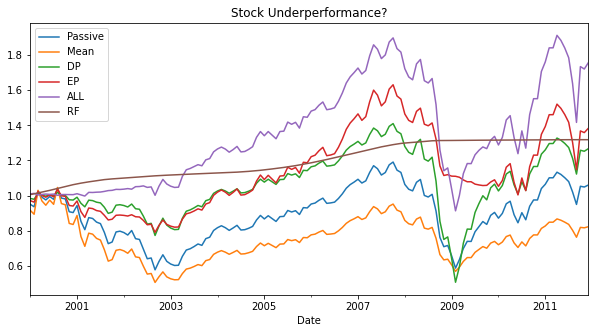

In [18]:
tab2000 = (fund_returns['2000':'2011']+1).cumprod()
tab2000['RF'] = (rf['2000':'2011']+1).cumprod()
tab2000.plot(figsize=(10,5),title='Stock Underperformance?');

# 4 Out-of-Sample Forecasting

In [19]:
def oos_rsquared(data,forecasts,null=None):
    data = data.copy()
    forecasts = forecasts.copy()
    null = null.copy()
    
    # if no Null forecast given, use expanding mean
    if null is None:
        null = data.expanding().mean().shift()

    # label Data and Null accordingly--input may be series or dataframe
    if isinstance(null, pd.DataFrame):
        null.columns = ['Null']
    elif isinstance(null,pd.Series):
        null.name = 'Null'
    if isinstance(data, pd.DataFrame):
        data.columns = ['Data']
    elif isinstance(data,pd.Series):
        data.name = 'Data'

    # double check data is aligned and no NaN (null will have NaN in first value by default)
    alldata = forecasts.join(data,how='inner',rsuffix='_Data').join(null,how='inner',rsuffix='_Null').dropna(axis=0)
    null = alldata[['Null']]
    data = alldata[['Data']]
    forecasts = alldata.drop(columns=['Data','Null'])


    # Forecast MSE
    err_forecast = forecasts.subtract(data.values)
    mse_forecast = (err_forecast**2).sum()

    # Null MSE
    err_null = null.subtract(data.values)
    mse_null = (err_null**2).sum()

    # OOS R-squared
    r2oos = (1 - mse_forecast/mse_null.values).to_frame().T
    r2oos.index = ['OOS-Rsquared']

    return r2oos

### Be careful in how you construct the timing / dates

Consider datestamp of $t =$ March 2021.
- We are building a forecast of SPY at $t+1$ (April) using data through $t$ (Mar).
- Note that `.loc[:t]` utilizes data including $t$.
- Thus `Xlag_t = Xlag.loc[:t,:]` and `yt=y.loc[:t]` are both using data through $t$ (Mar) in the regression.
- But `Xlag` is using through Feb of the actual signals, given that it is lagged.
- This is as we want: regress SPY through Mar on signals through Feb to predict Apr.

This leads to forecasts with dates stamped as $t$...
- for forecasts utilizing data through $t$
- forecasting a value at $t+1$

Thus, we shift the forecasts such that the datestamps reflect the date of the forecasted value, not the date through which data was used to generate them.

Because of this shifting, we start the forecast one period sooner, `BURN_PERIODS-2`, to account for the 0-indexing of a list and to account for the fact that in the loop it is assigning the forecast to the date it is calculated, which outside the loop we shift back.

In [20]:
BURN_PERIODS = 60

forecasts_OOS = pd.DataFrame(columns=model_map.keys(),index=spy.index, dtype='float64')

est = LinearRegression()

for model in model_map.keys():

    Xlag = sigs_lag[model_map[model]]
    X = sigs[model_map[model]]
    
    for t in spy.index[BURN_PERIODS-2:]:
        yt = spy.loc[:t].values.reshape(-1,1)
        Xlag_t = Xlag.loc[:t,:].values
        x_t = X.loc[t,:].values.reshape(1,-1)

        est.fit(Xlag_t,yt);
        predval = est.predict(x_t)[0,0]
        
        # this timing is assigning forecast to datestamp of info used to make the forecast
        forecasts_OOS.loc[t,model] = predval

forecasts_OOS.insert(0,'Mean', rets[['SPY']].expanding().mean().dropna())

# more convenient to have datestamp reflect date of the forecasted value
forecasts_OOS = forecasts_OOS.shift(1).dropna()
forecasts_OOS

,Mean,DP,EP,ALL
Date,,,,
1998-02-28,0.0158,0.0237,0.0074,0.0163
1998-03-31,0.0167,0.0282,0.0094,0.0206
1998-04-30,0.0172,0.0309,0.0112,0.0232
1998-05-31,0.0171,0.0298,0.0108,0.0216
1998-06-30,0.0165,0.0256,0.0082,0.0168
...,...,...,...,...
2021-06-30,0.0091,0.0045,0.0060,0.0053
2021-07-31,0.0092,0.0044,0.0018,0.0019
2021-08-31,0.0092,0.0043,0.0064,0.0062


## Investing

In [21]:
wts_OOS = 100 * forecasts_OOS

spy_OOS, _ = spy.align(forecasts_OOS, join='right', axis=0)

fund_returns_OOS = wts_OOS * spy_OOS.values
fund_returns_OOS.insert(0,'Passive', spy_OOS)
fund_returns_OOS

,Passive,Mean,DP,EP,ALL
Date,,,,,
1998-02-28,0.0693,0.1096,0.1643,0.0512,0.1128
1998-03-31,0.0488,0.0814,0.1375,0.0456,0.1004
1998-04-30,0.0128,0.0220,0.0395,0.0143,0.0297
1998-05-31,-0.0208,-0.0356,-0.0619,-0.0225,-0.0449
1998-06-30,0.0426,0.0705,0.1092,0.0351,0.0717
...,...,...,...,...,...
2021-06-30,0.0225,0.0205,0.0101,0.0134,0.0119
2021-07-31,0.0244,0.0224,0.0108,0.0044,0.0047
2021-08-31,0.0298,0.0274,0.0129,0.0192,0.0184


In [22]:
def summary_forecast_strategy(forecasts,target,forecasted_returns):
    
    # Forecast Accuracy Stats
    r2oos = oos_rsquared(target, forecasts, forecasts[['Mean']])

    corr_spy_tab = forecasts.corrwith(target.squeeze(),axis=0).to_frame().T
    corr_spy_tab.index = ['Corr. between forecast and target']
    
    display(pd.concat([r2oos,corr_spy_tab],axis=0))
    
    # Plot Forecasts
    plot_data = forecasts
    fig = plt.figure(figsize=(12,6))
    plt.plot(plot_data)
    plt.legend(plot_data.columns)
    plt.title('Forecasted Return')
    plt.show()   
    
    # Returns from investing in Forecasts    
    plot_data = (forecasted_returns + 1).cumprod()
    fig = plt.figure(figsize=(10,5))
    plt.plot(plot_data)
    plt.yscale('log')
    plt.legend(plot_data.columns)
    plt.title('Cumulative Returns of Strategies (Log Scale)')
    plt.show()   

    # Correlation of Returns from Forecasts
    print('Correlation of funds performances:')
    display(forecasted_returns.corr())
    
    corr_rolling = forecasted_returns.rolling(60).corr()
    dynamic_corrs = (corr_rolling['Passive'].unstack(1))
    dynamic_corrs = dynamic_corrs.reindex(columns=forecasted_returns.columns).drop(columns=['Passive'])
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(dynamic_corrs)
    plt.legend(plot_data.drop(columns=['Passive']).columns)
    plt.title('Rolling Correlation to Target')
    plt.show()      
    
    
    ### Performance Metrics of Strategy Based on Forecasts
    display(performanceMetrics(forecasted_returns,annualization=12).style.format('{:,.2%}'.format))
    
    display(tailMetrics(forecasted_returns))
    
    display(get_ols_metrics(target, forecasted_returns, annualization=12).style.format({
    'alpha': '{:,.2%}'.format,
    'Passive': '{:,.2f}'.format,
    'r-squared': '{:,.2%}'.format,
    'Info Ratio': '{:,.2%}'.format,
    })
    )

,Mean,DP,EP,ALL
OOS-Rsquared,0.0000,-0.0061,-0.0092,-0.0376
Corr. between forecast and target,-0.0548,-0.0291,0.0195,0.0405


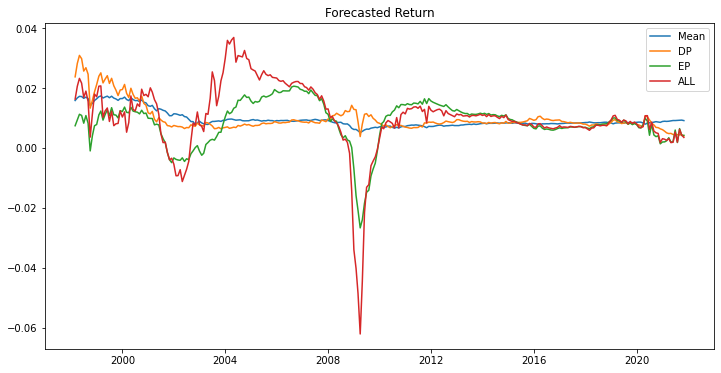

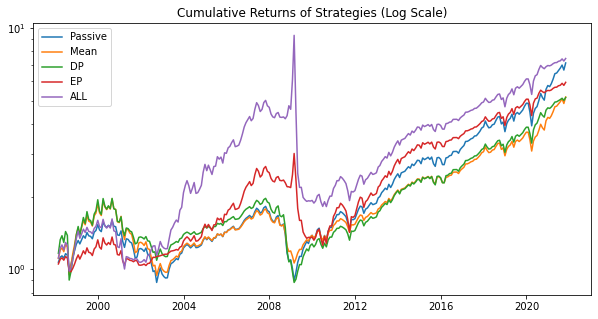

Correlation of funds performances:


,Passive,Mean,DP,EP,ALL
Passive,1.0000,0.9447,0.9021,0.4770,0.2763
Mean,0.9447,1.0000,0.9630,0.5409,0.4015
DP,0.9021,0.9630,1.0000,0.4978,0.3474
EP,0.4770,0.5409,0.4978,1.0000,0.8897
ALL,0.2763,0.4015,0.3474,0.8897,1.0000


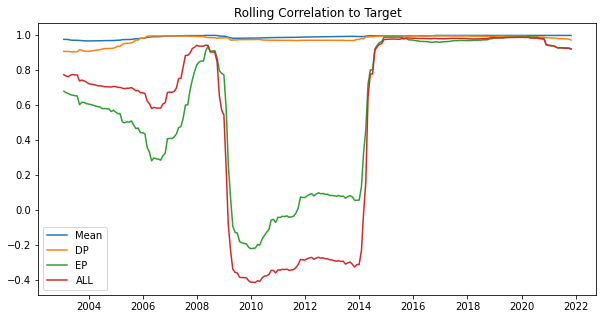

,Mean,Vol,Sharpe,Min,Max
Passive,9.50%,15.28%,62.14%,-16.52%,12.70%
Mean,8.15%,15.45%,52.76%,-23.27%,15.30%
DP,8.58%,17.80%,48.18%,-34.72%,16.43%
EP,8.89%,16.32%,54.45%,-23.85%,22.42%
ALL,12.10%,25.48%,47.47%,-51.86%,52.23%


,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
Passive,-0.5824,1.1057,-0.0745,-0.0987,-0.5080,2007-10-31,2009-02-28,2012-03-31,1613 days
Mean,-0.6425,3.3388,-0.0728,-0.1008,-0.5177,2000-08-31,2002-09-30,2013-07-31,4717 days
DP,-1.1594,8.8449,-0.0741,-0.1195,-0.5519,2007-10-31,2009-02-28,2013-10-31,2192 days
EP,-0.5816,5.8163,-0.0668,-0.1100,-0.5837,2009-02-28,2010-06-30,2014-06-30,1948 days
ALL,-0.8003,22.5407,-0.0734,-0.1617,-0.8050,2009-02-28,2010-08-31,NaT,NaT


,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
Passive,0.00%,1.0000,100.00%,0.0950,nan%
Mean,-0.92%,0.9553,89.24%,0.0853,-18.13%
DP,-1.40%,1.0511,81.38%,0.0816,-18.26%
EP,4.05%,0.5095,22.75%,0.1745,28.23%
ALL,7.72%,0.4607,7.63%,0.2626,31.53%


In [23]:
summary_forecast_strategy(forecasts_OOS,spy_OOS,fund_returns_OOS)

### We note the following from the OOS forecasts:
- OOS R-squared is negative for all three forecasting models.
- Sharpe Ratio is lower for all timing strategies than for the Passive approach.
- The Alpha is positive for the EP and ALL models, reflecting that the lower Sharpe is more than offset by the substantially lower beta to SPY (nearly 0.50, whereas the other strategies are near 1.)
- The correlation between EP and DP is lower OOS--close to 0.5.
- The correlation between EP and SPY and between ALL and SPY is near 1 most of the sample but is negative during 2009-2013.

# 5. Other Forecasting Approaches: In-Sample

Below we compare forecasting with mean return, OLS, and a few Machine Learning (ML) methods. Note that for brevity, we use just one model of signals: ALL={DP, EP, 10YR}. Can easily modify the model choice below.

## 5.1 CART

**Classification And Regression Tree (CART) is a nonlinear way to build a regression.**

- General, flexible model, but will OVERFIT for a single tree!
- Thus, to use this approach need to build many of these trees--a Random Forest--and then average over the results.
- Here we just build one tree, with a max depth of 4, for illustration


## 5.2 Neural Networks

- Discussing the math and application of these is beyond the scope of the course.
- Nonetheless, we use a NN with 100 hidden layers to try forecasting SPY.

In [24]:
MODEL = 'ALL'

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor


forecasts_ML = rets[['SPY']].expanding().mean().shift(1).dropna()
forecasts_ML.columns = ['Mean']

score_ML = pd.DataFrame(columns=['Mean'],index=['score'],data=0)

methods = ['OLS', 'Tree', 'NN']
est = dict()

y = spy.squeeze('columns').ravel()
X = sigs_lag[model_map[MODEL]]

for method in methods:

    if method == 'OLS':
        est[method] = LinearRegression()
    elif method == 'Tree':
        est[method] = RandomForestRegressor(max_depth=3,random_state=1)
    elif method == 'NN':
        est[method] = MLPRegressor(hidden_layer_sizes=500,random_state=1)
        
    est[method].fit(X,y)
    forecasts_ML[method] = est[method].predict(X)
    score_ML[method] = est[method].score(X,y)    

forecasts_ML.dropna(inplace=True)
forecasts_ML

,Mean,OLS,Tree,NN
Date,,,,
1993-03-31,0.0107,0.0120,0.0069,0.0061
1993-04-30,0.0165,0.0116,0.0069,0.0074
1993-05-31,0.0025,0.0120,0.0077,0.0059
1993-06-30,0.0086,0.0116,0.0081,0.0049
1993-07-31,0.0076,0.0118,0.0059,0.0081
...,...,...,...,...
2021-06-30,0.0091,0.0064,0.0099,0.0365
2021-07-31,0.0092,0.0030,0.0084,0.0539
2021-08-31,0.0092,0.0067,0.0079,0.0480


### Figure of Tree Estimation

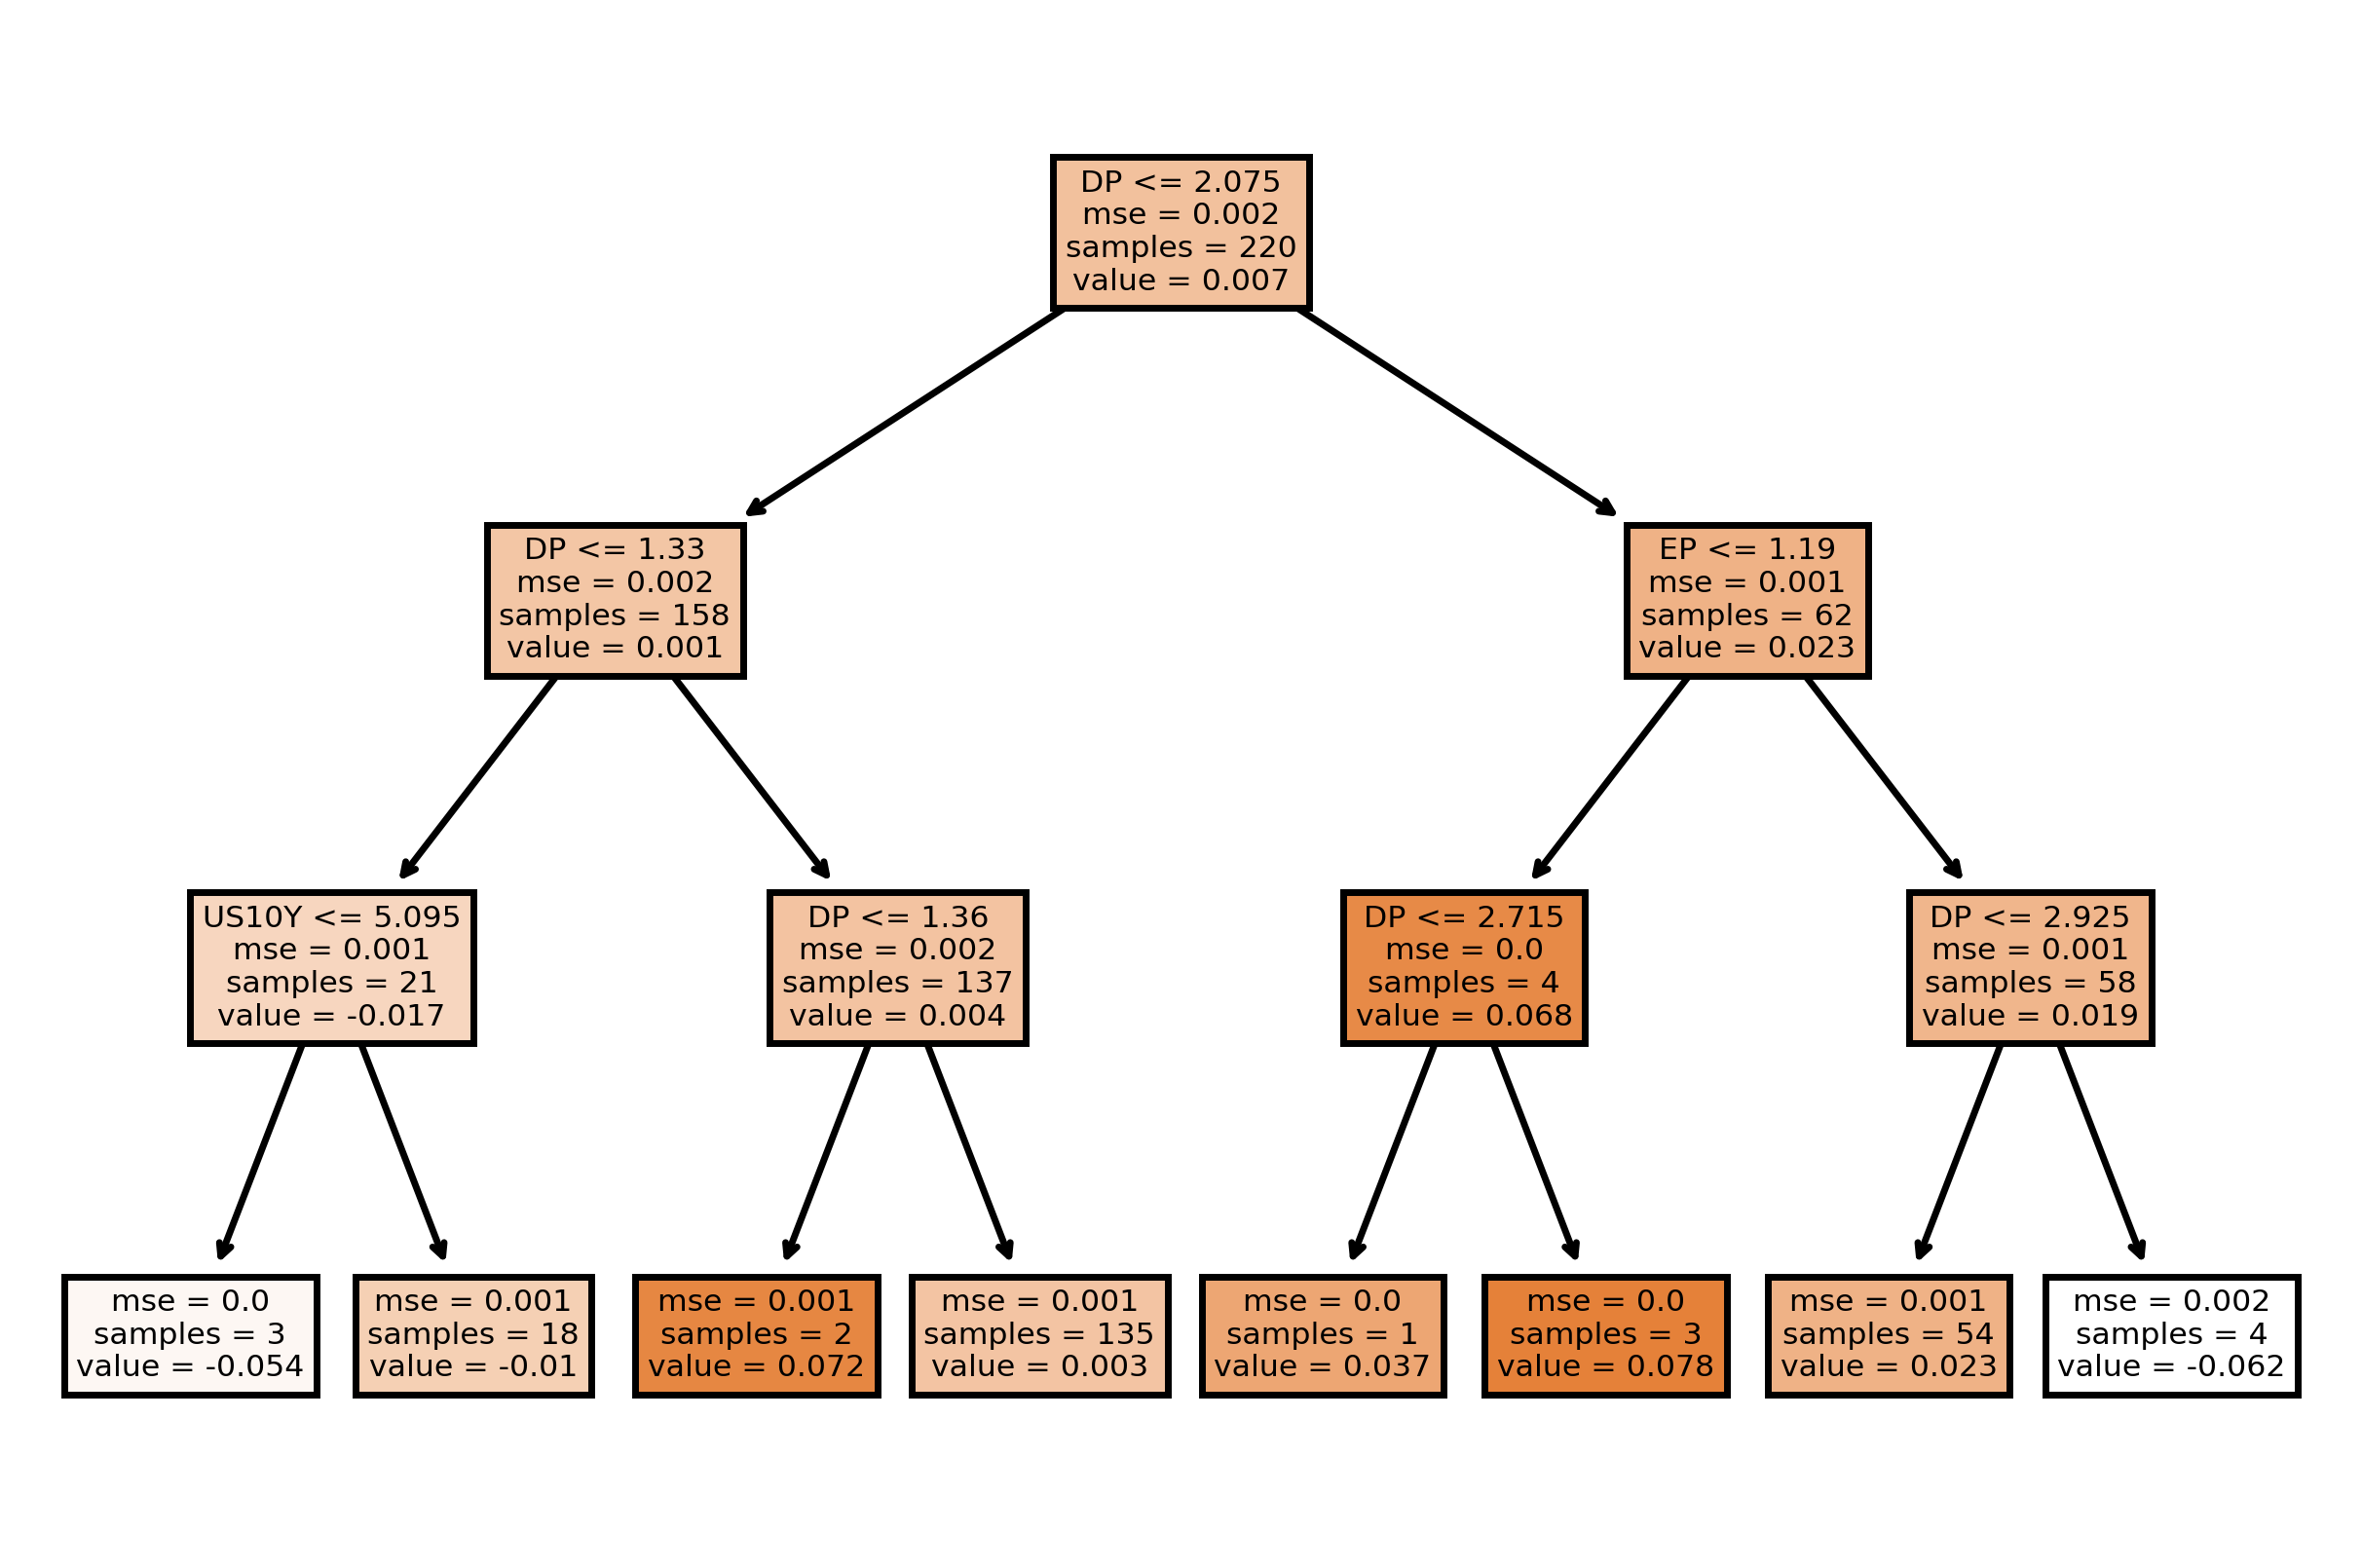

In [25]:
fn = X.columns
fig, axes = plt.subplots(nrows = 1,ncols=1, dpi=500);
tree.plot_tree(est['Tree'].estimators_[0],feature_names = fn, filled=True);

## Investing

In [26]:
wts_ML = 100 * forecasts_ML

spy_ML, _ = spy.align(forecasts_ML, join='right', axis=0)

fund_returns_ML = wts_ML * spy_ML.values
fund_returns_ML.insert(0,'Passive', spy_ML)
fund_returns_ML

,Passive,Mean,OLS,Tree,NN
Date,,,,,
1993-03-31,0.0224,0.0239,0.0269,0.0155,0.0136
1993-04-30,-0.0256,-0.0423,-0.0297,-0.0177,-0.0189
1993-05-31,0.0270,0.0067,0.0323,0.0209,0.0160
1993-06-30,0.0037,0.0032,0.0043,0.0030,0.0018
1993-07-31,-0.0049,-0.0037,-0.0057,-0.0028,-0.0039
...,...,...,...,...,...
2021-06-30,0.0225,0.0205,0.0144,0.0223,0.0821
2021-07-31,0.0244,0.0224,0.0073,0.0205,0.1316
2021-08-31,0.0298,0.0274,0.0200,0.0236,0.1430


,Mean,OLS,Tree,NN
OOS-Rsquared,0.000,0.0254,0.1625,-0.0773
Corr. between forecast and target,-0.036,0.1226,0.5025,0.0710


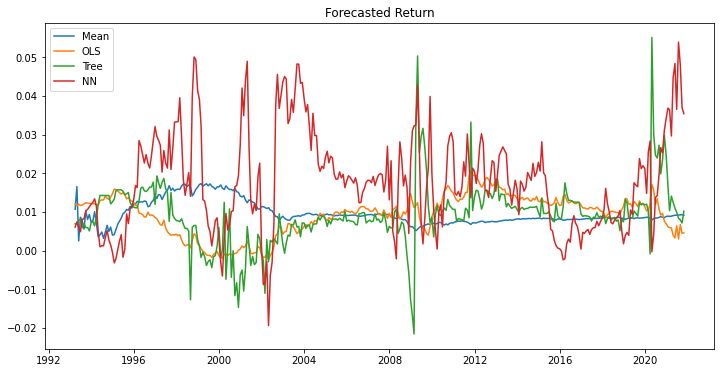

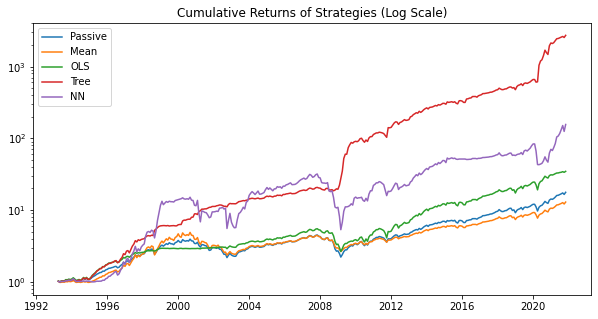

Correlation of funds performances:


,Passive,Mean,OLS,Tree,NN
Passive,1.0000,0.9423,0.8279,0.5166,0.8148
Mean,0.9423,1.0000,0.6392,0.3936,0.7810
OLS,0.8279,0.6392,1.0000,0.6481,0.6207
Tree,0.5166,0.3936,0.6481,1.0000,0.3605
NN,0.8148,0.7810,0.6207,0.3605,1.0000


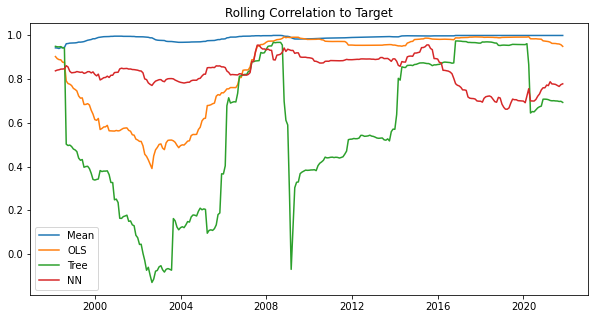

,Mean,Vol,Sharpe,Min,Max
Passive,11.14%,14.62%,76.20%,-16.52%,12.70%
Mean,10.12%,15.17%,66.73%,-23.27%,15.30%
OLS,13.54%,14.99%,90.32%,-17.02%,22.46%
Tree,30.22%,23.70%,127.50%,-8.12%,69.99%
NN,24.37%,36.11%,67.48%,-47.78%,42.52%


,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
Passive,-0.6182,1.2525,-0.0694,-0.0941,-0.5080,2007-10-31,2009-02-28,2012-03-31,1613 days
Mean,-0.5703,3.1574,-0.0674,-0.0966,-0.5177,2000-08-31,2002-09-30,2013-07-31,4717 days
OLS,0.0999,4.7525,-0.0645,-0.0964,-0.5193,2007-10-31,2009-02-28,2011-04-30,1277 days
Tree,4.7814,36.4059,-0.0387,-0.0586,-0.1512,2011-04-30,2011-09-30,2011-10-31,184 days
NN,0.0118,4.4900,-0.1440,-0.2397,-0.8326,2007-10-31,2009-02-28,2013-07-31,2100 days


,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
Passive,0.00%,1.0000,100.00%,0.1114,nan%
Mean,-0.77%,0.9779,88.79%,0.1035,-15.13%
OLS,4.08%,0.8491,68.55%,0.1595,48.56%
Tree,20.89%,0.8375,26.68%,0.3608,102.94%
NN,1.95%,2.0128,66.40%,0.1211,9.31%


In [27]:
summary_forecast_strategy(forecasts_ML,spy_ML,fund_returns_ML)

### Notes from ML Methods

- The CART method gets a positive OOS-R-squared.
- The NN has a negative OOS-R-squared, even though we're looking at in-sample results!
- The hyper-parameters of these models have not been tuned in any serious fashion.
- The CART method gets a huge Sharpe, alpha, Info ratio, positive skewness, and tiny Max Drawdown.
- We shouldn't be too surprised by the impressive CART performance given that it is an extremely flexible model prone to over-fitting, and we're examining in-sample results.
- This makes it even more glaring that the NN cannot generate better results in-sample.

# 6. Machine-Learning OOS

Another Extension section that was not originally listed in the homework.

This is just exploratory. Like in Section 5, we are not taking the tuning of the CART or NN seriously.

In [28]:
BURN_PERIODS = 60
MODEL = 'ALL'


forecasts_MLOOS = pd.DataFrame(columns=methods,index=spy.index,dtype='float64')

methods = ['OLS', 'Tree', 'NN']
est = dict()

y = spy.squeeze('columns').ravel()
Xlag = sigs_lag[model_map[MODEL]]
X = sigs[model_map[MODEL]]
    
for method in methods:
    
    print(method)
    
    for t in spy.index[BURN_PERIODS-1:]:
        yt = spy.loc[:t].values.ravel()
        Xlag_t = Xlag.loc[:t,:].values
        x_t = X.loc[t,:].values.reshape(1,-1)

        if method == 'OLS':
            est = LinearRegression()
        elif method == 'Tree':
            est = RandomForestRegressor(max_depth=3,random_state=1)
        elif method == 'NN':
            est = MLPRegressor(hidden_layer_sizes=500,random_state=1)

        est.fit(Xlag_t,yt);
        predval = est.predict(x_t)[0]
        forecasts_MLOOS.loc[t,method] = predval

forecasts_MLOOS.insert(0,'Mean', rets[['SPY']].expanding().mean().shift(1).dropna())

# prefer to date forecast by date of forecasted value, not date it was calculated
forecasts_MLOOS = forecasts_MLOOS.shift(1).dropna()

forecasts_MLOOS

OLS
Tree
NN


,Mean,OLS,Tree,NN
Date,,,,
1998-03-31,0.0158,0.0206,0.0375,0.0572
1998-04-30,0.0167,0.0232,0.0374,0.0489
1998-05-31,0.0172,0.0216,0.0279,0.0411
1998-06-30,0.0171,0.0168,0.0247,0.0435
1998-07-31,0.0165,0.0190,0.0317,0.0506
...,...,...,...,...
2021-06-30,0.0091,0.0053,0.0074,0.0355
2021-07-31,0.0091,0.0019,0.0011,0.0624
2021-08-31,0.0092,0.0062,-0.0014,0.0528


## Investment

The sizing of the strategies is too big to be comparable if we use 
$$w_t = 100 * \text{forecast}$$
Thus we use
$$w_t = \frac{\sigma^{\text{mkt}}_t}{\sigma_t^i} * \text{forecast}$$
which will mean each strategy tries to have vol nearly equal to the target return, SPY.

In [29]:
wts_MLOOS = 100 * forecasts_MLOOS

spy_MLOOS, _ = spy.align(forecasts_MLOOS, join='right', axis=0)

fund_returns_MLOOS = wts_MLOOS * spy_MLOOS.values
fund_returns_MLOOS.insert(0,'Passive', spy_MLOOS)

sigma_t = fund_returns_MLOOS.rolling(24).std()
relative_vols = pd.DataFrame(sigma_t[['Passive']].to_numpy() / sigma_t.drop(columns=['Passive']).to_numpy(),columns=sigma_t.drop(columns=['Passive']).columns, index=sigma_t.index)
wts_t = relative_vols * wts_MLOOS
fund_returns_MLOOS = wts_t * spy_MLOOS.values
fund_returns_MLOOS.insert(0,'Passive', spy_MLOOS)

fund_returns_MLOOS.dropna(inplace=True)

,Mean,OLS,Tree,NN
OOS-Rsquared,0.0000,-0.037,-0.2099,-0.5796
Corr. between forecast and target,-0.0719,0.038,-0.1230,-0.0594


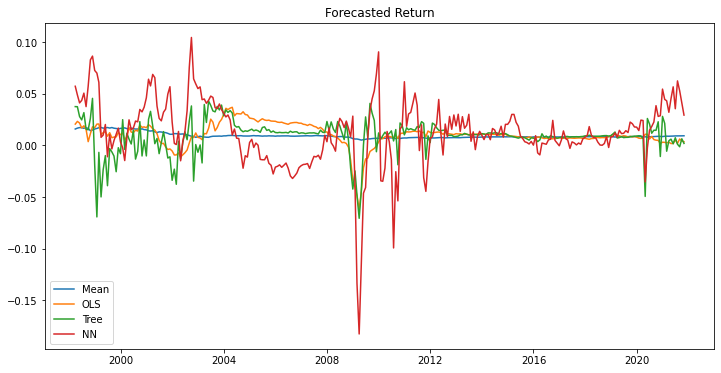

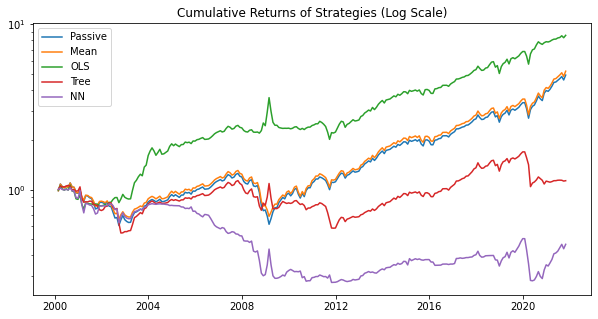

Correlation of funds performances:


,Passive,Mean,OLS,Tree,NN
Passive,1.0000,0.9937,0.4452,0.2885,0.3542
Mean,0.9937,1.0000,0.4944,0.3237,0.3707
OLS,0.4452,0.4944,1.0000,0.6363,0.5254
Tree,0.2885,0.3237,0.6363,1.0000,0.6715
NN,0.3542,0.3707,0.5254,0.6715,1.0000


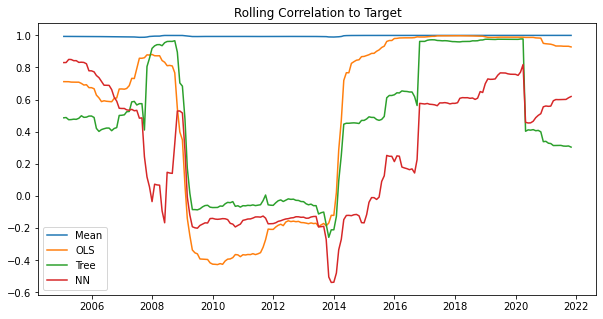

,Mean,Vol,Sharpe,Min,Max
Passive,8.49%,15.02%,56.52%,-16.52%,12.70%
Mean,8.62%,14.24%,60.58%,-15.79%,12.51%
OLS,11.12%,15.66%,71.03%,-17.52%,21.97%
Tree,1.86%,15.71%,11.85%,-26.25%,20.59%
NN,-1.95%,17.39%,-11.20%,-20.62%,24.52%


,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
Passive,-0.5151,1.0908,-0.0747,-0.0973,-0.5080,2007-10-31,2009-02-28,2012-03-31,1613 days
Mean,-0.4898,1.0478,-0.0680,-0.0891,-0.4724,2007-10-31,2009-02-28,2012-08-31,1766 days
OLS,0.3961,4.8928,-0.0635,-0.0985,-0.4407,2009-02-28,2011-09-30,2014-05-31,1918 days
Tree,-1.3729,8.0397,-0.0777,-0.1337,-0.4847,2000-07-31,2002-10-31,2007-04-30,2464 days
NN,-0.6021,5.7649,-0.0868,-0.1486,-0.7326,2000-08-31,2011-10-31,NaT,NaT


,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
Passive,-0.00%,1.0000,100.00%,0.0849,nan%
Mean,0.63%,0.9415,98.74%,0.0916,39.42%
OLS,7.18%,0.4640,19.82%,0.2397,51.23%
Tree,-0.70%,0.3017,8.33%,0.0617,-4.66%
NN,-5.43%,0.4098,12.54%,-0.0475,-33.38%


In [30]:
summary_forecast_strategy(forecasts_MLOOS,spy_MLOOS,fund_returns_MLOOS)

### Notes on the results

- The OOS R-squared is massively negative for CART and NN!
- CART was amazing in-sample, but OOS, the Sharpe is horrible, the alpha is negative, and the risk statistics are bad.
- NN does the worst of all of them OOS. Negative mean return, let alone alpha. The max drawdown is horrible.